In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import h5py
import api as pyq 

In [2]:
import concurrent.futures


In [3]:
# Wavefunction generation
from scf_runs import run_lda_he, run_casci
scf_checkfile, opt_checkfile, mf_lda = run_lda_he()
ci_checkfile, mc = run_casci(scf_checkfile, nroots=1, ncas =1, nelecas = (1,1))

/Users/ksu/Documents/GitHub/pyqmc/pyqmc/api.py
/Users/ksu/Software/anaconda3/lib/python3.11/site-packages/pyscf/__init__.py
He atom neutral LDA spin=0
HF
converged SCF energy = -2.86151422722833  <S^2> = 2.4424907e-15  2S+1 = 1
LDA
converged SCF energy = -2.83456474290722  <S^2> = 3.1086245e-15  2S+1 = 1
CASCI nelecas up/down (1, 1)
CASCI E = -2.85953978800606  E(CI) = -2.85953978800606  S^2 = 0.0000000
Available output from CASCI: <KeysViewHDF5 ['ci', 'fci', 'mo_coeff', 'ncas', 'nelecas']>


In [4]:
import importlib, recipes, linemin, sample_many
modules = [recipes, linemin, sample_many]
for m in modules:
    importlib.reload(m)


for fname in ['sj.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING VMC OPTIMIZATION")


ncore = 12
with concurrent.futures.ProcessPoolExecutor(max_workers=ncore) as client:
    recipes.OPTIMIZE(scf_checkfile, "sj.hdf5", 
                     max_iterations=6, 
                     nconfig=1000, 
                     verbose=True,
                     jastrow_kws={"ion_cusp":False},
                     client = client, 
                     npartitions=ncore
                    )

# Jastrow optimization results
df = recipes.read_opt("sj.hdf5")

# with h5py.File("sj.hdf5") as f:
#     print("keys", list(f.keys()))
#     print("wave function parameters", list(f['wf'].keys()))
#     ee_j = f['energy'][...]   
#     x = f['x'][...]
#     yfit = f['yfit'][...]
#     # pgrad = f['pgradient'][...]   
#     print(f['wf/wf2acoeff'][()])
#     print(f['wf/wf2bcoeff'][()])



RUNNING VMC OPTIMIZATION
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.14090332704141614
Dot product between gradient and SR step:  0.9783264589110202
descent en -2.870015261323009 0.004166437330424963
energies from correlated sampling [-2.87745331 -2.88787492 -2.89569905 -2.90112544 -2.9043385 ]
----------vmc done
Gradient norm:  0.05451503943075416
Dot product between gradient and SR step:  0.9832397596903271
descent en -2.8769119874625835 0.006230476761682359
energies from correlated sampling [-2.90036158 -2.90206182 -2.90352466 -2.90475363 -2.90575226]
----------vmc done
Gradient norm:  0.052242075429762655
Dot product between gradient and SR step:  0.9044558491570963
descent en -2.897099954374354 0.0023847199327019894
energies from correlated sampling [-2.88706616 -2.88819802 -2.88918568 -2.89002869 -2.89072662]
----------vmc done
Gradient norm:  0.03355204510610178
Dot product between gradient and SR step:  0.9704851967460879
descent en -2.8865530890480744 

In [5]:
df

,energy,iteration,error,fname
0,-2.870015,0,0.004166,sj.hdf5
1,-2.876912,1,0.006230,sj.hdf5
2,-2.897100,2,0.002385,sj.hdf5
3,-2.886553,3,0.002716,sj.hdf5
4,-2.950270,4,0.015579,sj.hdf5
5,-2.902204,5,0.010101,sj.hdf5


In [12]:
import importlib 
import wftools, bosonrecipes, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools,mc, boson_stochastic_reconfiguration, bosonenergy
modules = [bosonrecipes,wftools, bosonaccumulators, bosonslater, linemin, accumulators, bosonwftools,mc, boson_stochastic_reconfiguration, bosonenergy]
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
abvmc_file = 'abvmc-j-he_single.hdf5'
for fname in [abvmc_file]:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION")

nblocks = 100
nsteps_per_block = 10
tstep=0.3
nconfig=1000
ncore = 1
# with concurrent.futures.ProcessPoolExecutor(max_workers=ncore) as client:
#     bosonrecipes.ABOPTIMIZE(scf_checkfile, 
#                       abvmc_file, 
#                       ci_checkfile = ci_checkfile,
#                       max_iterations=6, 
#                       verbose=True,  
#                       # nblocks=nblocks, 
#                       # nsteps_per_block=nsteps_per_block,
#                       # tstep= tstep, 
#                       jastrow_kws={"ion_cusp":False},
#                       client = client, 
#                       npartitions=ncore,                            
#                       nconfig=nconfig)
bosonrecipes.ABOPTIMIZE(scf_checkfile, 
                  abvmc_file, 
                  ci_checkfile = ci_checkfile,                        
                  max_iterations=12, 
                  verbose=True,  
                  # nblocks=nblocks, 
                  # nsteps_per_block=nsteps_per_block,
                  # tstep= tstep, 
                  # jastrow_kws={"ion_cusp":False},
                  nconfig=nconfig)
recipes.read_opt(abvmc_file)

RUNNING ABVMC OPTIMIZATION
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.9780641293802496
Dot product between gradient and SR step:  0.8884125761022481
[ 0.02337978  0.0150516   0.00894201  0.00617988 -0.13097996 -0.08390786
 -0.3337798  -0.20959505  0.          0.0019773   0.          0.
 -0.06309115  0.          0.         -0.1245571   0.        ]
descent en -2.56395708650918 0.02167139523164817
energies from correlated sampling [-2.32368019 -2.75566073 -2.9046924  -2.8744828  -2.73880089]
----------vmc done
Gradient norm:  0.12738199489070723
Dot product between gradient and SR step:  0.9543101479595023
[ 0.01921862  0.00684678 -0.00284784 -0.00788637 -0.15675337 -0.08860703
 -0.36296101 -0.18918223  0.          0.00927397  0.          0.
 -0.04102838  0.          0.         -0.10175956  0.        ]
descent en -2.8744933227565297 0.004800810689414677
energies from correlated sampling [-2.50554638 -2.49901728 -2.48788369 -2.47192687 -2.450

,energy,iteration,error,fname
0,-2.563957,0,0.021671,abvmc-j-he_single.hdf5
1,-2.874493,1,0.004801,abvmc-j-he_single.hdf5
2,-2.845753,2,0.016807,abvmc-j-he_single.hdf5
3,-2.848145,3,0.016672,abvmc-j-he_single.hdf5
4,-2.873379,4,0.012721,abvmc-j-he_single.hdf5
5,-2.839377,5,0.018627,abvmc-j-he_single.hdf5
6,-2.850591,6,0.014535,abvmc-j-he_single.hdf5
7,-2.847050,7,0.007094,abvmc-j-he_single.hdf5
8,-2.860830,8,0.008587,abvmc-j-he_single.hdf5
9,-2.811206,9,0.011145,abvmc-j-he_single.hdf5


keys ['SRdot', 'configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'pgrad', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 2.          2.        ]
  [ 0.07812471  0.078391  ]
  [ 0.10749082  0.11119841]
  [-0.03455    -0.01758795]
  [-0.35961016 -0.30630774]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.         -0.05575766  0.        ]
 [ 0.         -0.21509025  0.        ]
 [ 0.         -0.22533892  0.        ]]


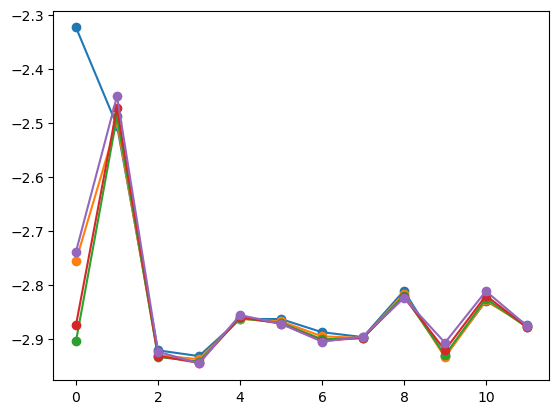

In [14]:
with h5py.File(abvmc_file) as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    # pgrad = f['pgradient'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


Text(0, 0.5, 'Partial gradients')

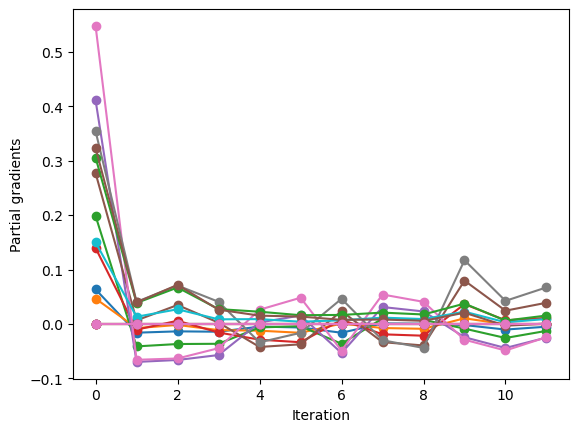

In [15]:
f = h5py.File(abvmc_file)
aa=f['pgrad'][...]
import matplotlib.pyplot as plt
plt.plot(aa, marker='o', label="etot")
plt.xlabel('Iteration')
plt.ylabel('Partial gradients')

In [175]:
# def get_variance(df, 
#                  discard = 10):
#     keys = df.keys()
#     numblocks = df[keys[0]].shape[0]
#     num_used_blocks = numblocks - discard
#     print('\t\t\t{:10s} {:6s} {:3s}'.format('Mean', 'Var', 'Ratio'))
#     for k in keys:
#         eb = df[k][discard:]
#         mean = np.mean(eb)
#         var = np.sqrt(1/(num_used_blocks - 1 ) * np.sum(eb**2 - mean**2))
#         print('{} \t {:.6f} \t {:.6f} {:.3f}'.format(k, mean, var, np.abs(var/mean)))

In [30]:
# get_variance(bosonrecipes.read_abvmc("bosonvmc.hdf5"),
#             discard=0)
# df2 = bosonrecipes.read_abvmc("bosonvmc.hdf5")
# df2
# plt.plot(df2['energytotal'], '-o', label='tot')
# # plt.plot(df2['energyei'], label='ei')
# # plt.plot(df2['energyee'], label='ee')
# # plt.plot(df2['energyke'], label='ke')
# # plt.plot(df2['energyvxc'], label='vxc')
# # plt.axhline(y=0, linestyle='dashed')
# plt.legend()

In [17]:
import importlib, recipes, bosonrecipes, bosonslater, bosonaccumulators, bosonwftools 
modules = [recipes, bosonrecipes, bosonrecipes, bosonslater, bosonaccumulators, bosonwftools] # Reloads recipes.py file after each update
for m in modules:
    importlib.reload(m)

# Boson Jastrow optimizationn
    
for fname in ['bosonsjnoi.hdf5']:
    if os.path.isfile(fname):
        os.remove(fname)
print("RUNNING ABVMC OPTIMIZATION NO ION CUSP")
wf, df = bosonrecipes.ABOPTIMIZE(scf_checkfile, "bosonsjnoi.hdf5", max_iterations=24, nconfig=1000, verbose=True,
                                jastrow_kws={"ion_cusp":False}
                                )

# Jastrow optimization results
dfnoi = pyq.read_opt("bosonsjnoi.hdf5")
dfnoi



RUNNING ABVMC OPTIMIZATION NO ION CUSP
Number of determinants in the bosonic wavefunction= 1
Using spherical guess
starting warmup
finished warmup
----------vmc done
Gradient norm:  0.1453199792541806
Dot product between gradient and SR step:  0.9784617716604322
descent en -2.8666383753081197 0.0013890246203200724
energies from correlated sampling [-2.79603046 -2.82335953 -2.84618373 -2.86489457 -2.87984999]
----------vmc done
Gradient norm:  0.04944151437772344
Dot product between gradient and SR step:  0.9877517491069976
descent en -2.8891615788326606 0.0016532874021162169
energies from correlated sampling [-2.87774984 -2.87969227 -2.88151087 -2.88320591 -2.88477768]
----------vmc done
Gradient norm:  0.031107552629770007
Dot product between gradient and SR step:  0.9888479405707269
descent en -2.889596875293664 0.001612251778042078
energies from correlated sampling [-2.87433707 -2.87568714 -2.87697399 -2.87819816 -2.87936013]
----------vmc done
Gradient norm:  0.02843026307168962
Do

,energy,iteration,error,fname
0,-2.866638,0,0.001389,bosonsjnoi.hdf5
1,-2.889162,1,0.001653,bosonsjnoi.hdf5
2,-2.889597,2,0.001612,bosonsjnoi.hdf5
3,-2.886646,3,0.001079,bosonsjnoi.hdf5
4,-2.889349,4,0.000861,bosonsjnoi.hdf5
5,-2.889454,5,0.001528,bosonsjnoi.hdf5
6,-2.891159,6,0.001383,bosonsjnoi.hdf5
7,-2.893427,7,0.000784,bosonsjnoi.hdf5
8,-2.890395,8,0.001207,bosonsjnoi.hdf5
9,-2.890467,9,0.001246,bosonsjnoi.hdf5


keys ['SRdot', 'configs', 'energy', 'energy_error', 'est_min', 'iteration', 'nconfig', 'pgrad', 'tau', 'wf', 'x', 'yfit']
wave function parameters ['wf2acoeff', 'wf2bcoeff']
[[[ 0.14807857  0.14986633]
  [ 0.22169254  0.22336089]
  [ 0.06112087  0.06198473]
  [-0.04934876 -0.04688615]]]
[[-0.25       -0.5        -0.25      ]
 [ 0.         -0.06997235  0.        ]
 [ 0.         -0.26191307  0.        ]
 [ 0.         -0.15962388  0.        ]]


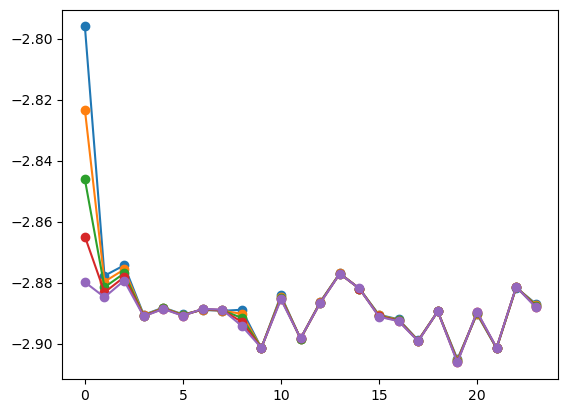

In [24]:
with h5py.File("bosonsjnoi.hdf5") as f:
    print("keys", list(f.keys()))
    print("wave function parameters", list(f['wf'].keys()))
    ee_j = f['energy'][...]   
    x = f['x'][...]
    yfit = f['yfit'][...]
    pgrad = f['pgrad'][...]   
    print(f['wf/wf2acoeff'][()])
    print(f['wf/wf2bcoeff'][()])

import matplotlib.pyplot as plt
plt.plot(yfit, marker='o', label="etot")


In [25]:
# f = h5py.File("bosonsjnoi.hdf5")
# aa=f['params'][...]
# import matplotlib.pyplot as plt
# plt.plot(aa, marker='o', label="etot")
# plt.xlabel('Iteration')
# plt.ylabel('Value of Jastrow parameters')